# Evaluation Project - 7 Flight Price Prediction

# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# Importing Required Libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Data Set:

> #  Training data:

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


> # Testing Data:

In [47]:
df1=pd.read_excel('Test_set.xlsx')
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [7]:
#To get the data dimension 
df.shape

(10683, 11)

In [7]:
#To get all the information regarding data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.isnull().sum() #checking the null value count of all the coulumns

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# filling up the null values of both training and testing data:

In [8]:
df['Route'].fillna(method='ffill',inplace=True)
df['Total_Stops'].fillna(method='ffill',inplace=True)

In [39]:
df1['Route'].fillna(method='ffill',inplace=True)
df1['Total_Stops'].fillna(method='ffill',inplace=True)

In [12]:
df=df_n
df_n

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


In [14]:
df_n.isnull().sum() #checking the null value count of all the coulumns

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df_n.shape

(10683, 11)

In [16]:
df_n.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683.0
unique,12,44,5,6,128,222,1343,368,5,10,1870.0
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,10262.0
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,258.0


# Graphical analysis:
scatter plot is shown with respect to Price variable

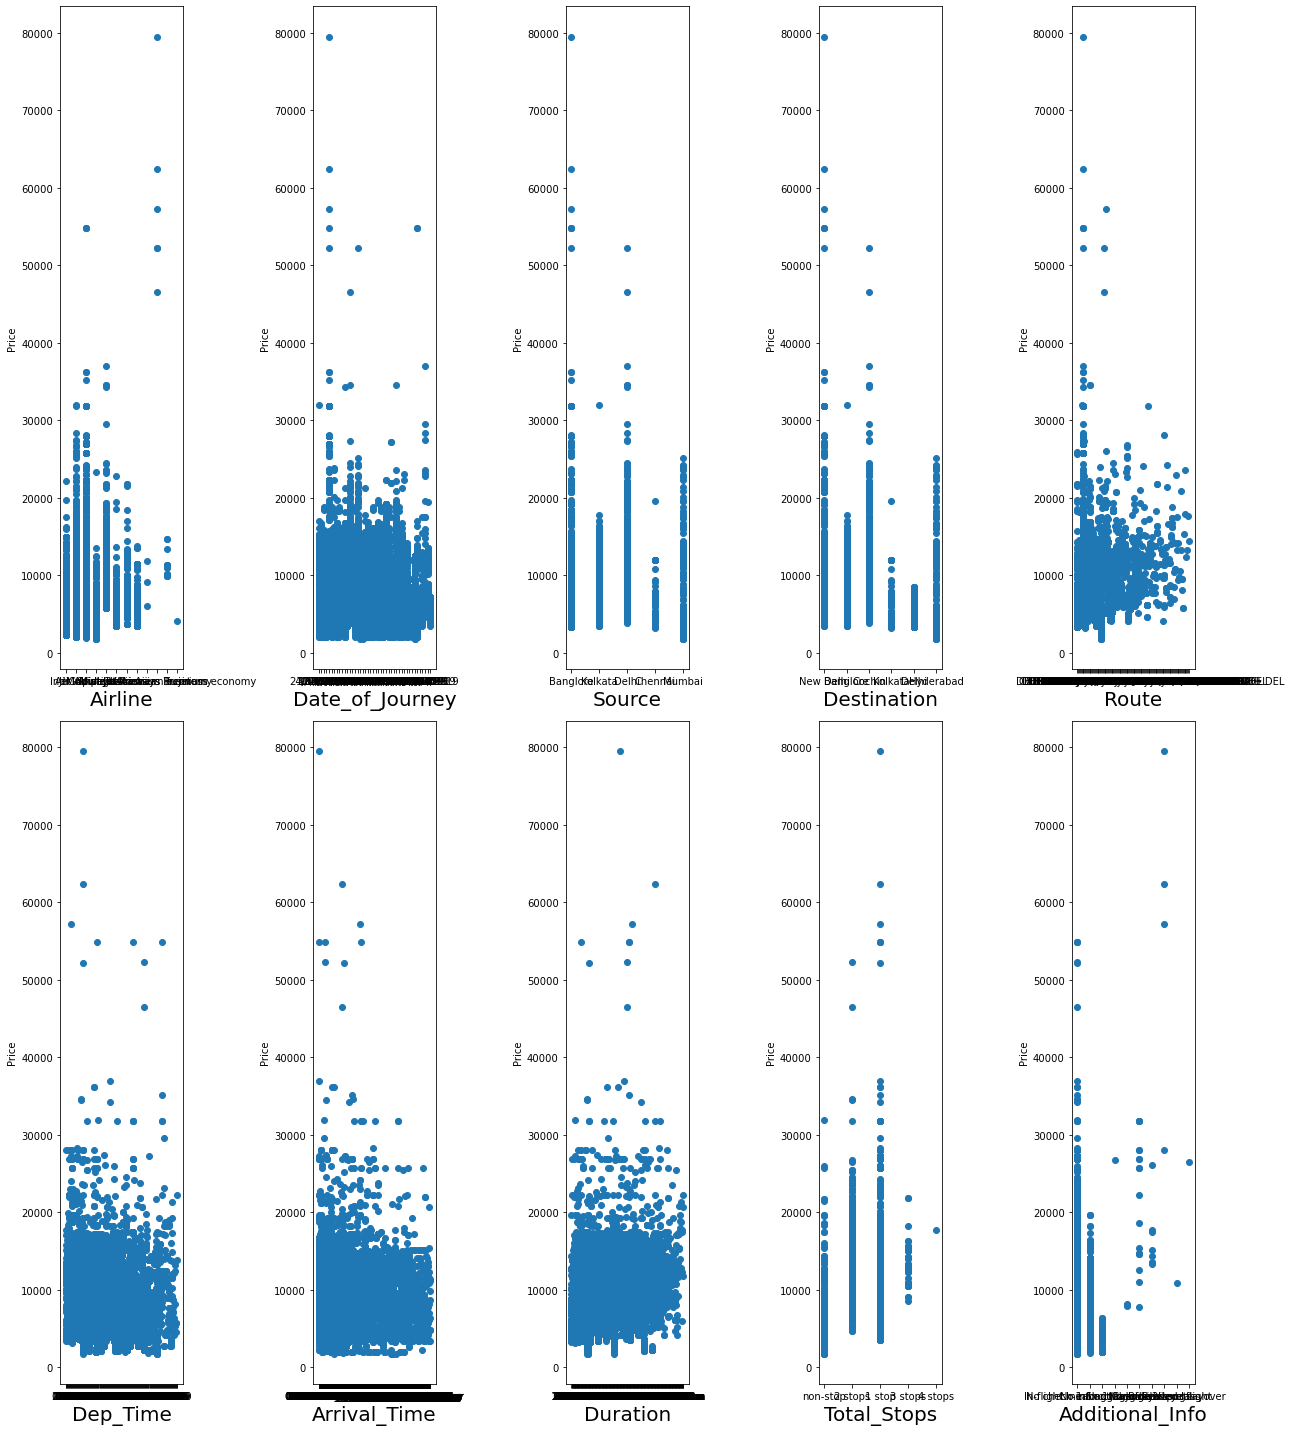

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

y=df_n['Price']
x=df_n.drop(columns=['Price'])
plt.figure(figsize=(18,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=10)
    plotnumber+=1 
plt.tight_layout()

# OrdinalEncoding:
> # TO convert all object type data to numerical of both training and testing data.

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df_n.columns:
    if df_n[i].dtypes=="object":
        df_n[i]=ord_enc.fit_transform(df_n[i].values.reshape(-1,1))


In [19]:
df_n

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,65.0
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,669.0
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,1537.0
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,389.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,1457.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,4.0,8.0,81.0
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,4.0,8.0,84.0
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,4.0,8.0,604.0
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,4.0,8.0,1377.0


In [49]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=ord_enc.fit_transform(df1[i].values.reshape(-1,1))


In [50]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0


# Correlatin using heat map of training data;

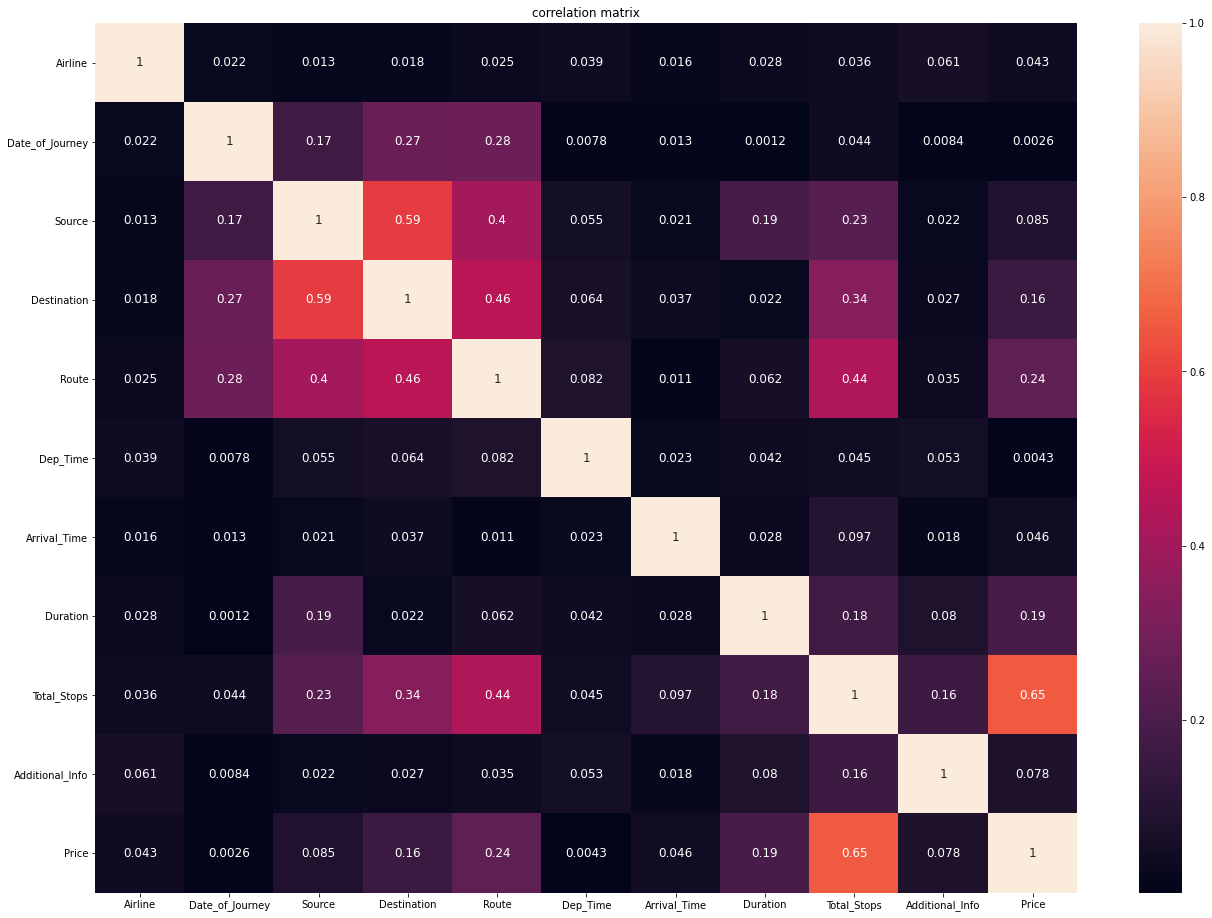

In [20]:
df_corr=df_n.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show() 

# Correlation with Price variable to all the features in training data

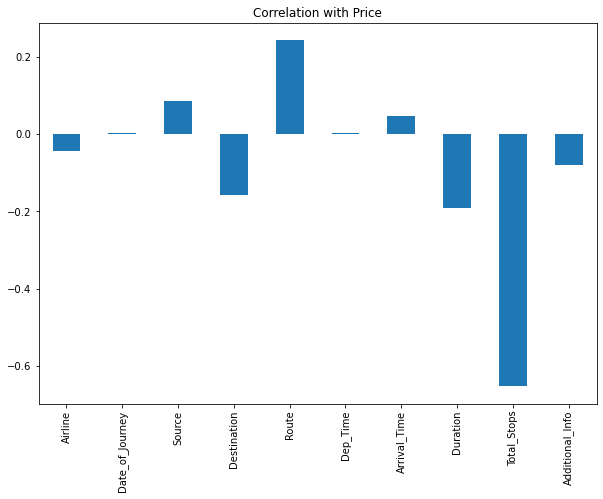

In [21]:
df_n.drop('Price',axis=1).corrwith(df_n.Price).plot(kind='bar',grid=False,figsize=(10,7),title='Correlation with Price')
plt.show()

# Checking Outliers:

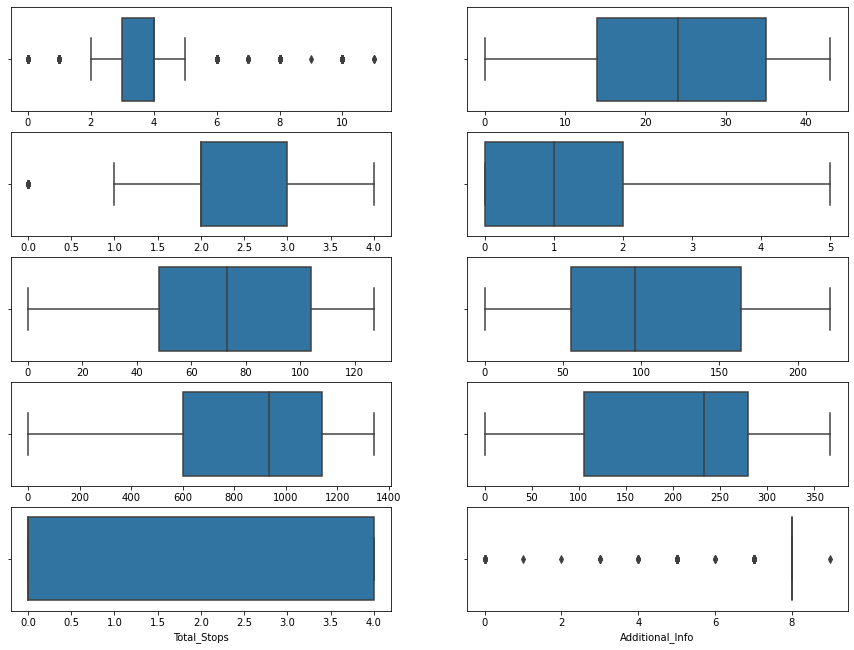

In [22]:
x=df_n.drop(columns=['Price'])
plt.figure(figsize=(15,18))
graph=1
for column in x:
    if graph<=10:
        ax=plt.subplot(8,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column)
    graph+=1
plt.show()  

# Skewness:

In [23]:
df_n.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.502065
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.631251
Additional_Info   -1.779838
Price              0.114408
dtype: float64

Since most of the data are categorical skewness is not considered.

# Removing outlier using Zscore technique:

In [14]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_n)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_n[filtering_entry]
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,65.0
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,669.0
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,1537.0
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,389.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,1457.0


In [15]:
df.shape#checking the shape of the dataset

(10658, 11)

# Percentage data loss:

In [26]:
loss_percent=(13354-13327)/13354*100
loss_percent

0.20218661075333233

# Model Building:

In [16]:
x=df.drop(columns='Price')
y=df.Price

# Scaling the x variable:

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.41115087,  0.01721669, -1.66539036, ...,  0.42222118,
         1.40457527,  0.50564975],
       [-1.26112585, -1.44619421,  0.88803783, ...,  1.30649694,
        -0.25549532,  0.50564975],
       [ 0.01383662,  1.5619282 ,  0.0368951 , ..., -0.81208041,
        -0.25549532,  0.50564975],
       ...,
       [ 0.01383662,  0.42371972, -1.66539036, ...,  0.79066941,
         1.40457527,  0.50564975],
       [ 2.56376155, -1.93399785, -1.66539036, ...,  0.40379877,
         1.40457527,  0.50564975],
       [-1.26112585,  1.48062759,  0.0368951 , ...,  1.40782021,
        -0.25549532,  0.50564975]])

# test data declaration:

In [51]:
X=df1


In [19]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Creating train-test split:

In [20]:
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)


# LinearRegression model:

In [21]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=regression.predict(X_test)
y_pred

array([1148.87651013,  994.55690161,  889.65300515, ..., 1109.9780324 ,
       1222.41714019, 1084.20199442])

In [23]:
y_predtr=regression.predict(x_train)
y_predtr

array([1182.07269631, 1331.27932727, 1193.00302997, ..., 1153.47334373,
        938.14541114,  271.78574161])

In [24]:
r2_score(y_test,y_pred) #r2 score of linear regression model

0.45305527698632253

# CrossValidation score:

In [25]:
training_accuracy=r2_score(y_train,y_predtr)
testing_accuracy=r2_score(y_test,y_pred)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    csv=cross_val_score(regression,x,y,cv=i)
    cv_mean=csv.mean()
    print('at cv:-',i)
    print('cv score-',cv_mean*100)
    print('training_accuracy-',training_accuracy*100)
    print('testing_accuracy-',testing_accuracy*100)

at cv:- 2
cv score- 44.13944834151102
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254
at cv:- 3
cv score- 44.18801854614851
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254
at cv:- 4
cv score- 44.22030437373391
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254
at cv:- 5
cv score- 44.20199303313213
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254
at cv:- 6
cv score- 44.15523083229066
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254
at cv:- 7
cv score- 44.14880609158401
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254
at cv:- 8
cv score- 44.20452684640415
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254
at cv:- 9
cv score- 44.187122518080955
training_accuracy- 44.07983201905717
testing_accuracy- 45.305527698632254


CV=4 is one of the best score that we considered.

# Regularisation and HyperParameter Tuning:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


# Lasso Regression :

In [28]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test,pred_ls)
lss

0.4530478623970866

In [29]:
from sklearn.model_selection import cross_val_score


In [30]:
csv=cross_val_score(ls,x,y,cv=4)
cv_mean=csv.mean()
cv_mean

0.4422070204913767

# Using Ensemble Approach:

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[10,15],
            'min_samples_split':[10,11]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 10}


# RandomForestRegression:

In [33]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=15,min_samples_split=10)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(X_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=4)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  90.3639203416482
Cross validation Score:  90.5875096726007


# DecisionTreeRegression:

In [34]:
from sklearn.tree import DecisionTreeRegressor

param_grid={'criterion':['mse', 'mae'],
            'max_depth':range(10,15),
            'min_samples_split':range(3,8),
            'max_features':['auto', 'sqrt', 'log2'],
            #'max_leaf_nodea':range(3,7)
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 7}


In [34]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(criterion='mse',max_features='auto',max_depth=10,min_samples_split=7)
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr=dtr.predict(X_test)

dtrs=r2_score(y_test,pred_dtr)
print('R2 Score: ',dtrs*100)

dtrcsv=cross_val_score(dtr,x,y,cv=4)
dtr_cv_mean=dtrcsv.mean()
print('Cross validation Score: ',dtr_cv_mean*100)

R2 Score:  83.79611303049631
Cross validation Score:  84.97467121350313


# KNeighborsRegression:

In [36]:
from sklearn.neighbors import KNeighborsRegressor

param_grid={'algorithm':['kd-tree','brute'],
            'leaf_size':[3,5 ,6,7,8],
            'n_neighbors':[3,5,7,9,11,13],
            'p':[1,2]}
knr=KNeighborsRegressor()
clf=GridSearchCV(knr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 9, 'p': 1}


In [36]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(algorithm='brute',leaf_size=3,n_neighbors=9,p=1)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred_knr=knr.predict(X_test)

knrs=r2_score(y_test,pred_knr)
print('R2 Score: ',knrs*100)

knrcsv=cross_val_score(knr,x,y,cv=4)
knr_cv_mean=knrcsv.mean()
print('Cross validation Score: ',knr_cv_mean*100)

R2 Score:  80.81807290017603
Cross validation Score:  80.91235535533734


# Out of all model Random foprest regressor is having R2 Score:  90.3639203416482 and Cross validation Score:  90.5875096726007 .So, this model is finalised and further saved.

# Saving the  trained model:

In [37]:
import pickle
filename='flightprice_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# loading the model:

In [ ]:
loaded_model=pickle.load(open('flightprice_prediction.pkl','rb'))


# Predicting the Price for tested dataset using trained model:

In [56]:
Y=rf.predict(X)
len(Y)# length of the Y column series

2671

# Adding the Price column to the tested dataset:

In [57]:
df1["Price"]=Y
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0,755.326636
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0,755.326636
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0,755.326636
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0,755.326636
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0,866.314491
...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0,1282.684592
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0,378.840441
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0,755.326636
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0,1282.684592


In [60]:
df1['Price']

0        755.326636
1        755.326636
2        755.326636
3        755.326636
4        866.314491
           ...     
2666    1282.684592
2667     378.840441
2668     755.326636
2669    1282.684592
2670     755.326636
Name: Price, Length: 2671, dtype: float64

# Creating a dataframe for the output of tested data:

In [67]:
data=pd.DataFrame({'Price':Y})
data

,Price
0,755.326636
1,755.326636
2,755.326636
3,755.326636
4,866.314491
...,...
2666,1282.684592
2667,378.840441
2668,755.326636
2669,1282.684592


# saving the output to an excel file:

In [68]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('test_data_Price.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()